(Multivariable_calculus)=
# Multivariable calculus (Lecture 2)
[<!-- module-mm1 badge --><span class="module module-mm1">Mathematics Methods 1</span>](module-mm1) 


In [1]:
## This cell just imports necessary modules
import numpy as np
from sympy import sin, cos, Function, Symbol, symbols, diff, integrate, exp, pi
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## First partial derivatives

**Slide 10**

In [2]:
# Define the independent variables using Symbol
r = Symbol('r')
h = Symbol('h')

# Define the function V(r,h)
V = pi*(r**2)*h

# The first partial derivative of V w.r.t h (i.e. r is kept constant)
print("The first partial derivative of V w.r.t. h is: ", diff(V, h))
# The first partial derivative of V w.r.t r (i.e. h is kept constant)
print("The first partial derivative of V w.r.t. r is: ", diff(V, r))

The first partial derivative of V w.r.t. h is:  pi*r**2
The first partial derivative of V w.r.t. r is:  2*pi*h*r


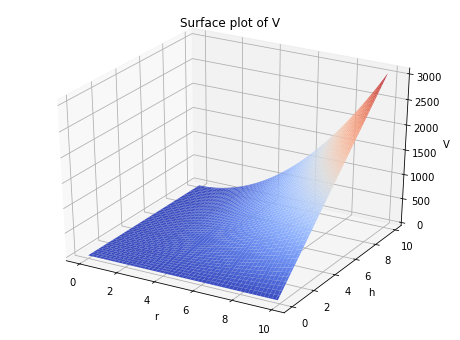

In [3]:
r = np.arange(0, 10, 0.1)
h = np.arange(0, 10, 0.1)

R, H = np.meshgrid(r, h)

V = np.pi * R**2 * H

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot_surface(R, H, V, cmap='coolwarm', edgecolor='none')
ax1.set_xlabel('r')
ax1.set_ylabel('h')
ax1.set_zlabel('V')
ax1.set_title('Surface plot of V')
plt.show()

## Second partial derivatives

**Slide 12**

In [4]:
x = Symbol('x')
y = Symbol('y')
f = (x**2)*sin(y)

f_x = diff(f, x)
f_y = diff(f, y)

print("The first partial derivatives of f = (x**2)*sin(y) are: ")
print("f_x = ", f_x)
print("f_y = ", f_y)

f_xx = diff(f_x, x)
f_xy = diff(f_x, y)
f_yx = diff(f_y, x)
f_yy = diff(f_y, y)

print("The second partial derivatives of f = (x**2)*sin(y) are: ")
print("f_xx = ", f_xx)
print("f_xy = ", f_xy)
print("f_yy = ", f_yy)
print("f_yx = ", f_yx)

if f_xy == f_yx:
    print("\nf_xy = f_yx")
else:
    print("Error")

The first partial derivatives of f = (x**2)*sin(y) are: 
f_x =  2*x*sin(y)
f_y =  x**2*cos(y)
The second partial derivatives of f = (x**2)*sin(y) are: 
f_xx =  2*sin(y)
f_xy =  2*x*cos(y)
f_yy =  -x**2*sin(y)
f_yx =  2*x*cos(y)

f_xy = f_yx


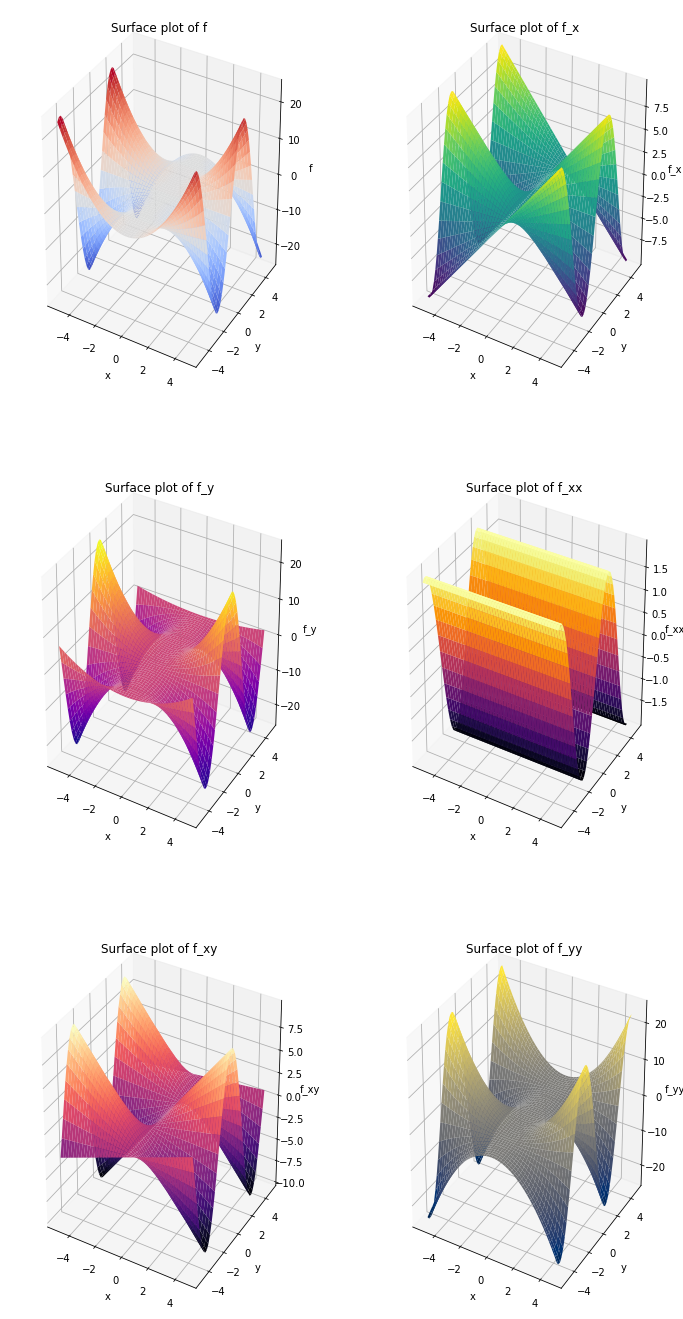

In [6]:
x = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(x, x)

f = X**2 * np.sin(Y)
f_x = 2 * X * np.sin(Y)
f_y = X**2 * np.cos(Y)
f_xx = 2 * np.sin(Y)
f_xy = 2 * X * np.cos(Y)
f_yy = -X**2 * np.sin(Y)

graphs = [f, f_x, f_y, f_xx, f_xy, f_yy]
titles = ['f', 'f_x', 'f_y', 'f_xx', 'f_xy', 'f_yy']
cmaps = ['coolwarm', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

fig, ax = plt.subplots(3, 2, figsize=(12, 24), subplot_kw={'projection':'3d'})
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].plot_surface(X, Y, graphs[i], cmap=cmaps[i], edgecolor='none')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_zlabel(titles[i])
    ax[i].set_title(f'Surface plot of {titles[i]}')
    
plt.show()

## Chain rule

**Slide 19**

In [7]:
a, b, t = symbols('a b t')

x = a*t
y = b*t

T = 3*y*sin(x)

# SymPy automatically applies the chain rule here:
print("Differentiating T = 3*y*sin(x) wrt t using the chain rule:")
print(diff(T, t))

Differentiating T = 3*y*sin(x) wrt t using the chain rule:
3*a*b*t*cos(a*t) + 3*b*sin(a*t)


## Definite and indefinite integrals

**Slide 21**

In [8]:
x, y = symbols('x y')

# Remember: Indefinite integrals result in a constant 'c'. SymPy sets this to zero.
# f is the function we want to integrate.
f = cos(x)

# The second argument is the variable we want to integrate with respect to.
# (in this example, it is 'x').
print("Integrating cos(x) yields:", integrate(f, x))

# Using integrate(2*x, (x, a, b)) evaluates a DEFINITE integral between x=a and x=b
a = 0
b = 2
print("Integrating 2*x between x=0 and x=2 yields:", integrate(2*x, (x, a, b)))

Integrating cos(x) yields: sin(x)
Integrating 2*x between x=0 and x=2 yields: 4


## Double integrals

**Slide 26**

In [9]:
# The function we want to integrate.
f = 2*(x**2)*y

# First integrate f wrt y between y=0 and y=2.
inner_integral = integrate(f, (y, 0, 2)) 
print("The inner integral is: ", inner_integral)

# Then integrate the inner_integral wrt x.
outer_integral = integrate(inner_integral, (x, 0, 2)) 
print("The outer integral is: ", outer_integral)

The inner integral is:  4*x**2
The outer integral is:  32/3


In [10]:
x = Symbol('x')
y = Symbol('y')
f = Function('f')

f = 2 * x**2 * y

print("Integral of f w.r.t x and y is: ", integrate(f, x, y))

Integral of f w.r.t x and y is:  x**3*y**2/3


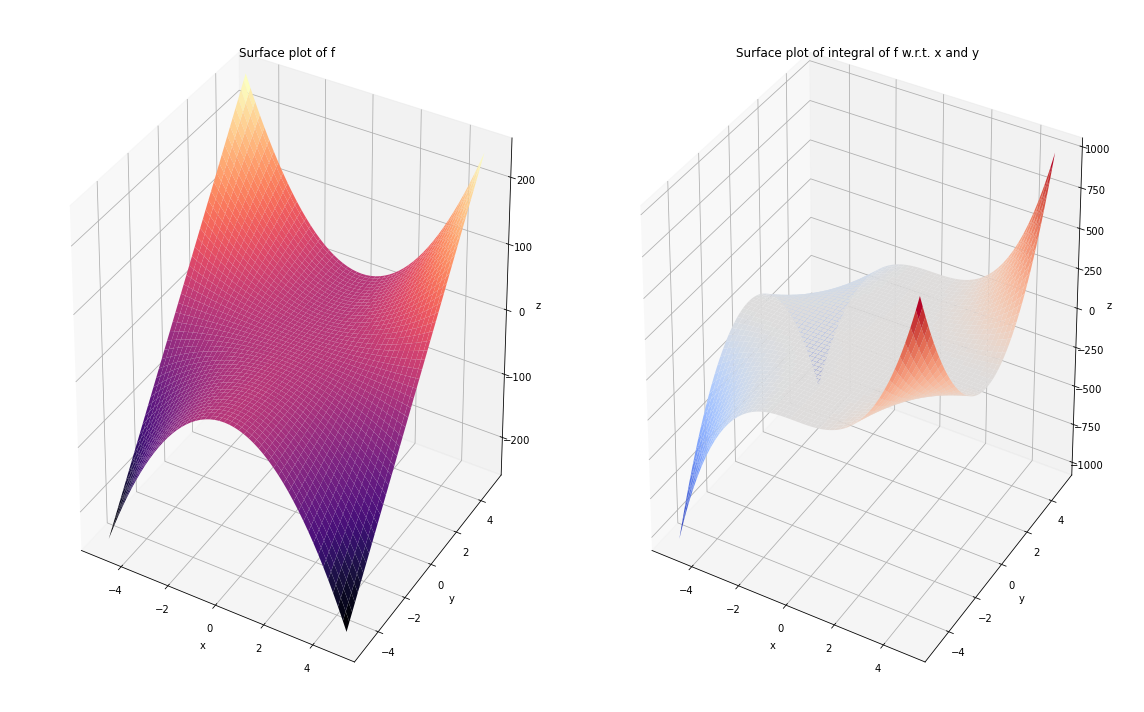

In [13]:
x = np.arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(x, y)

f = 2 * X**2 * Y
integral = 1/3 * X**3 * Y**2

fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, f, cmap='magma', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Surface plot of f')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, integral, cmap='coolwarm', edgecolor='none')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Surface plot of integral of f w.r.t. x and y')

fig.tight_layout()
plt.show()